# Bank Credit Card Type Prediction

The dataset contains information about bank customers who use a credit card issued by the bank. It includes various demographic, financial, and behavioral attributes to predict their credit card category.


#### Importing Necessary Packages

In [5]:
import os
import numpy as np  # for Mathematical Calculation
import pandas as pd  # for Data Manipulation
import seaborn as sns  # Data Visualization Package along with statistics
import matplotlib.pyplot as plt  # Data Visualization

# By default, visualization will appear in Jupyter Notebook
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

#### Load the Bank Customer dataset

In [7]:
bank = pd.read_csv("BankCustomers.csv")

#### First 5 rows of the dataset to get an overview

In [9]:
bank.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


####  Dimensions (rows, columns) of the DataSet

In [11]:
bank.shape

(10127, 21)

####  Check for missing values (null values) in each column

In [13]:
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Information about the DataSet
summary of the dataset including column names, data types, non-null counts, and memory usage

In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Identify categorical variables that need conversion to numerical format  
* Convert categorical columns (e.g., 'Income_Category') into numerical values  
* Since the column contains ranges as strings, it must be encoded before feeding into a model  

#### List of all column names in the Data 

In [18]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Average credit limit and total number of customers for each gender

In [20]:
bank[['Gender','Credit_Limit']].groupby('Gender').agg(['mean','count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

* Males have much higher credit limits than females

The average credit limit for males (~ 12,686) is more than double that of females (~ 5,024).

This suggests that banks are offering higher credit limits to male customers compared to female customers.

* Why do females have lower credit limits?

Possible reasons:

Females in this dataset may have lower reported incomes.

Banks might be more conservative in assigning credit limits to women.

There could be historical biases in credit approvals.

Males might have longer credit histories or higher spending patterns.

#### Average credit utilization ratio between male and female customers.

In [23]:
bank[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean','count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

* Females use more of their available credit than males

On average, females use 34.2% of their credit limit.

Males, on the other hand, use only 19.9% of their credit limit.

This suggests that females depend more on credit cards compared to males.

* There are more female customers (5,358) than male customers (4,769)

This could mean that more women have credit cards in this dataset.

The sample size difference could also impact the trend.

* Why does this matter?

If females have a higher credit utilization ratio, they might be:

Spending more on credit

Having lower credit limits than males

More financially dependent on credit cards

Banks may use this insight to adjust credit limits, interest rates, or marketing strategies based on gender.

#### Maximum age of customers in each category.

In [26]:
bank_cards =  bank.groupby('Card_Category')
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

* Older customers tend to have Blue and Silver cards

The oldest customer in the Blue card category is 73 years old.

The oldest in Silver is 65 years old.

These cards might be entry-level or standard cards, making them accessible to a wider age range, including older customers.

* Gold and Platinum cardholders are younger

The oldest Gold cardholder is 63, while the oldest Platinum cardholder is 56.

This suggests that higher-tier cards (Platinum, Gold) might be more common among younger individuals, possibly due to higher income or more active credit use.

* Possible Reasons:

Higher-tier cards (Platinum, Gold) may have stricter eligibility criteria, which older customers might not meet.

Older customers may prefer simpler or more traditional credit card options (like Blue or Silver).

Younger customers may apply for premium cards earlier in their careers, leading to a lower maximum age for those categories.



#### Minimum age of customers in each category

In [29]:
bank_cards =  bank.groupby('Card_Category')
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

* Younger customers tend to have Blue and Silver cards

The youngest customer in Blue is 26 years old, and in Silver also 26.

These might be entry-level or beginner cards, making them more common for younger individuals who are new to credit.

* Higher-tier cards (Gold, Platinum) are held by slightly older customers

The youngest Gold cardholder is 29, and the youngest Platinum cardholder is 39.

This suggests that premium cards may require more credit history or income, which younger people might not yet have.

* Possible Reasons:

Blue and Silver cards could have lower eligibility requirements, making them more accessible to young adults.

Gold and Platinum might require higher incomes or better credit scores, which younger customers may not meet yet.

#### Average credit utilization ratio for each category.

In [32]:
bank_cards['Avg_Utilization_Ratio'].mean() 

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

* Blue cardholders have the highest utilization (29.09%)

Customers in this category are using almost 30% of their available credit on average.

Blue might be an entry-level card with lower credit limits, leading to higher usage.

These customers may rely more on credit for their expenses.

* Gold, Silver, and Platinum cardholders have very low utilization (~ 4-6%)

Gold (5.71%), Silver (5.73%), and Platinum (4.37%) users use very little of their available credit.

This suggests they may have higher credit limits or lower spending needs.

Platinum users, in particular, have the lowest utilization, likely because they have higher income and better financial management.

#### Number of customers in each 'Card_Category' within each Marital Status Category



In [35]:
bank_marital= bank.groupby('Marital_Status')
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: count, dtype: int64

* Blue is the most common card across all marital statuses

The majority of customers, regardless of marital status, have Blue cards (entry-level).

Married customers hold the highest number of Blue cards (4,433), followed by Single (3,624).

* Higher-tier cards (Gold, Platinum, Silver) are less common

Only a small percentage of customers hold Gold and Platinum cards.

Platinum is the rarest card—only 1 divorced person, 7 married, 10 single, and 2 unknown marital status holders.

* Married individuals tend to have more premium cards

Highest count of Silver (206), Gold (41), and Platinum (7) holders.

This suggests higher financial stability and better credit access for married individuals.

* Single customers hold more premium cards than Divorced or Unknown status customers

Singles have more Silver (251), Gold (58), and Platinum (10) cards than Divorced or Unknown groups.

They might be in an active financial phase (higher spending, career growth).

* Divorced and Unknown customers have fewer premium cards

They have fewer Silver, Gold, and Platinum cards, which could indicate lower financial stability or limited access to credit.

#### Let's see if we have any categorical data in our data set

##### Attrition_Flag

In [39]:
bank['Attrition_Flag'].value_counts()
# attrited Customer is defaulter / stopped using their card / Customer has already closed his /her account ,not associted with the bank as of now 
# so we can remove them from the predication as they alredy left the bank ,also we can keep  them for the tracking purpose

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

* Most customers (83.94%) are still active

The majority of customers are retaining their credit cards and not leaving the bank.

This suggests the bank has a relatively strong customer base.

* 16.0% of customers have attrited

These are customers who have stopped using their credit cards or closed their accounts.

This attrition rate is not extremely high, but it still needs attention.

* Possible reasons for attrition:

High fees or interest rates

Better offers from competitors

Low credit limits or poor customer service

Fraudulent accounts that the bank closed



##### Gender

In [42]:
bank['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

* Slightly more female customers (52.91%) than male (47.09%)

The difference is not very large, suggesting the bank serves a fairly balanced customer base.

* Possible reasons for gender differences:

Women might be more financially engaged with this bank, leading to a higher customer count.

The bank's marketing strategies or financial products may appeal more to female customers.

Men and women might have different spending habits, credit limits, or financial goals.

##### Education_Level

In [45]:
bank['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

* Most customers are graduates (30.86%)

This indicates a well-educated customer base, which may correlate with better financial literacy and higher income levels.

* High School graduates make up the second-largest group (19.86%)

A significant portion of customers do not have a college degree, meaning they might have different credit needs and spending patterns.

* 14.98% of customers have ‘Unknown’ education levels

This missing data could be due to lack of disclosure or incomplete records. It might affect deeper analysis.

* Uneducated customers make up 14.67%

This group may need financial education programs to help them manage credit and loans wisely.

* Post-Graduates & Doctorates are a small portion (9.54% combined)

These customers might belong to higher-income segments, possibly qualifying for premium credit cards with higher limits.

##### Marital_Status 

In [48]:
bank['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

* Nearly half of the customers are married (46.29%)

Married customers may have higher financial stability and could be eligible for higher credit limits.

* Single customers make up 38.93% of the base

This group might have different spending patterns, potentially favoring lower credit limits but higher spending activity.

* 7.40% of customers have an ‘Unknown’ marital status

This missing data could impact deeper analysis, as we cannot categorize them into specific financial behavior patterns.

* Divorced customers account for 7.39%

They might have different credit needs due to life changes (e.g., separation of finances, new financial responsibilities).

##### Card_Category

In [51]:
bank['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

* The majority of customers (89.11%) hold a Blue card

The Blue card is likely the basic or entry-level credit card, suggesting that most customers do not upgrade to higher-tier cards.

* Only 5.24% of customers have a Silver card

This could mean Silver cards require certain eligibility criteria, or customers don’t find them beneficial enough to upgrade.

* Gold (1.10%) and Platinum (0.19%) cards are very rare

These might be premium cards that require higher credit scores, higher income levels, or special offers.

It could also indicate that the bank is not actively promoting these higher-tier cards.



##### Income_Category

In [54]:
bank['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

* Most customers (33.65%) earn less than $40K per year

This indicates a large proportion of low-income customers. These individuals may have lower credit limits and different spending behaviors.

* Mid-range income groups ($40K - $120K) are fairly balanced

Customers earning between $40K and $120K make up a significant portion (44.65%) of the customer base.

They might have moderate to high credit limits and could be good targets for premium card offers.

* Only 6.87% of customers earn more than $120K

The bank has a relatively small high-income customer base, which may impact the adoption of high-tier credit cards (Gold, Platinum).

This group is likely to have higher credit limits and lower default risks.

* 10.51% of customers have an "Unknown" income category

Missing data could affect model performance, especially for credit risk analysis.



### Label Encoding on Categorical Columns

Since machine learning models require numerical data, we need to convert categorical variables into numeric values. Label Encoding is a common technique where each unique category is assigned a numerical value.

##### Label Encoading on Gender Coulmn

In [58]:
def ref1(x):
    if x=='M':
        return 1
    else:
        return 0

bank['Gender'] = bank['Gender'].map(ref1)

In [59]:
bank['Gender'].value_counts()

Gender
0    5358
1    4769
Name: count, dtype: int64

##### Label Encoading on Attrition Flag

In [61]:
def ref2(x):
    if x=='Existing Customer':
        return 1
    else:
        return 0
bank['Attrition_Flag'] =  bank['Attrition_Flag'].map(ref2)

In [62]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

#### Label encoding with sklearn LabelEncoder 
Label encoding with sklearn LabelEncoder

##### Income_Category

In [65]:

# y=bank['Card_Category']
# x=bank.copy()

In [66]:
# x.head(2)

In [67]:
from sklearn.preprocessing import LabelEncoder
def Label_Encoder(feature):
    le = LabelEncoder()
    le.fit(feature)
    print(feature.name,le.classes_)
    return(le.transform(feature))

In [68]:
bank['Income_Category'] = Label_Encoder(bank['Income_Category'])
bank['Income_Category'].value_counts()

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']


Income_Category
4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: count, dtype: int64

##### Education_Level 

In [70]:
bank['Education_Level'] = Label_Encoder(bank['Education_Level'] )
bank['Education_Level'].value_counts()

Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']


Education_Level
2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: count, dtype: int64

##### Marital_Status

In [72]:
bank['Marital_Status'] = Label_Encoder(bank['Marital_Status'] )
bank['Marital_Status'].value_counts()

Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


Marital_Status
1    4687
2    3943
3     749
0     748
Name: count, dtype: int64

##### Card_Category

In [74]:
bank['Card_Category'] = Label_Encoder(bank['Card_Category'])
bank['Card_Category'].value_counts()


Card_Category ['Blue' 'Gold' 'Platinum' 'Silver']


Card_Category
0    9436
3     555
1     116
2      20
Name: count, dtype: int64

In [75]:
bank.info()
bank.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  int32  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(10127, 21)

#### Splitting the data into independent variables and target variable

In [77]:
#This extracts the target variable (Card_Category), which we want to predict.Since this is a multiclass classification problem, y will contain encoded numerical labels representing different credit card categories.
y=bank['Card_Category']

#Drops CLIENTNUM because it's just a unique identifier and does not contribute to model prediction.
#Drops Card_Category from x because it's the target variable (y).
#x now contains all the independent variables (features) used for model training.

x=bank.drop(['CLIENTNUM', 'Card_Category'], axis=1)

In [78]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [79]:
y.value_counts()

Card_Category
0    9436
3     555
1     116
2      20
Name: count, dtype: int64

In [80]:
#x.head()

### Statistical Summary

In [82]:
x.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Key Observations:

Potential Preprocessing Steps:
✅ Feature Scaling: Apply StandardScaler or MinMaxScaler for Credit Limit, Total Trans Amt, and Utilization Ratio due to large value ranges.
✅ Outlier Handling: Credit_Limit and Total_Trans_Amt have high max values compared to their 75th percentiles. Consider capping or log transformation.
✅ Feature Engineering: Create a "Years as Customer" feature from Months_on_book / 12.

###  Outlier Handling

##### Check for Outlier

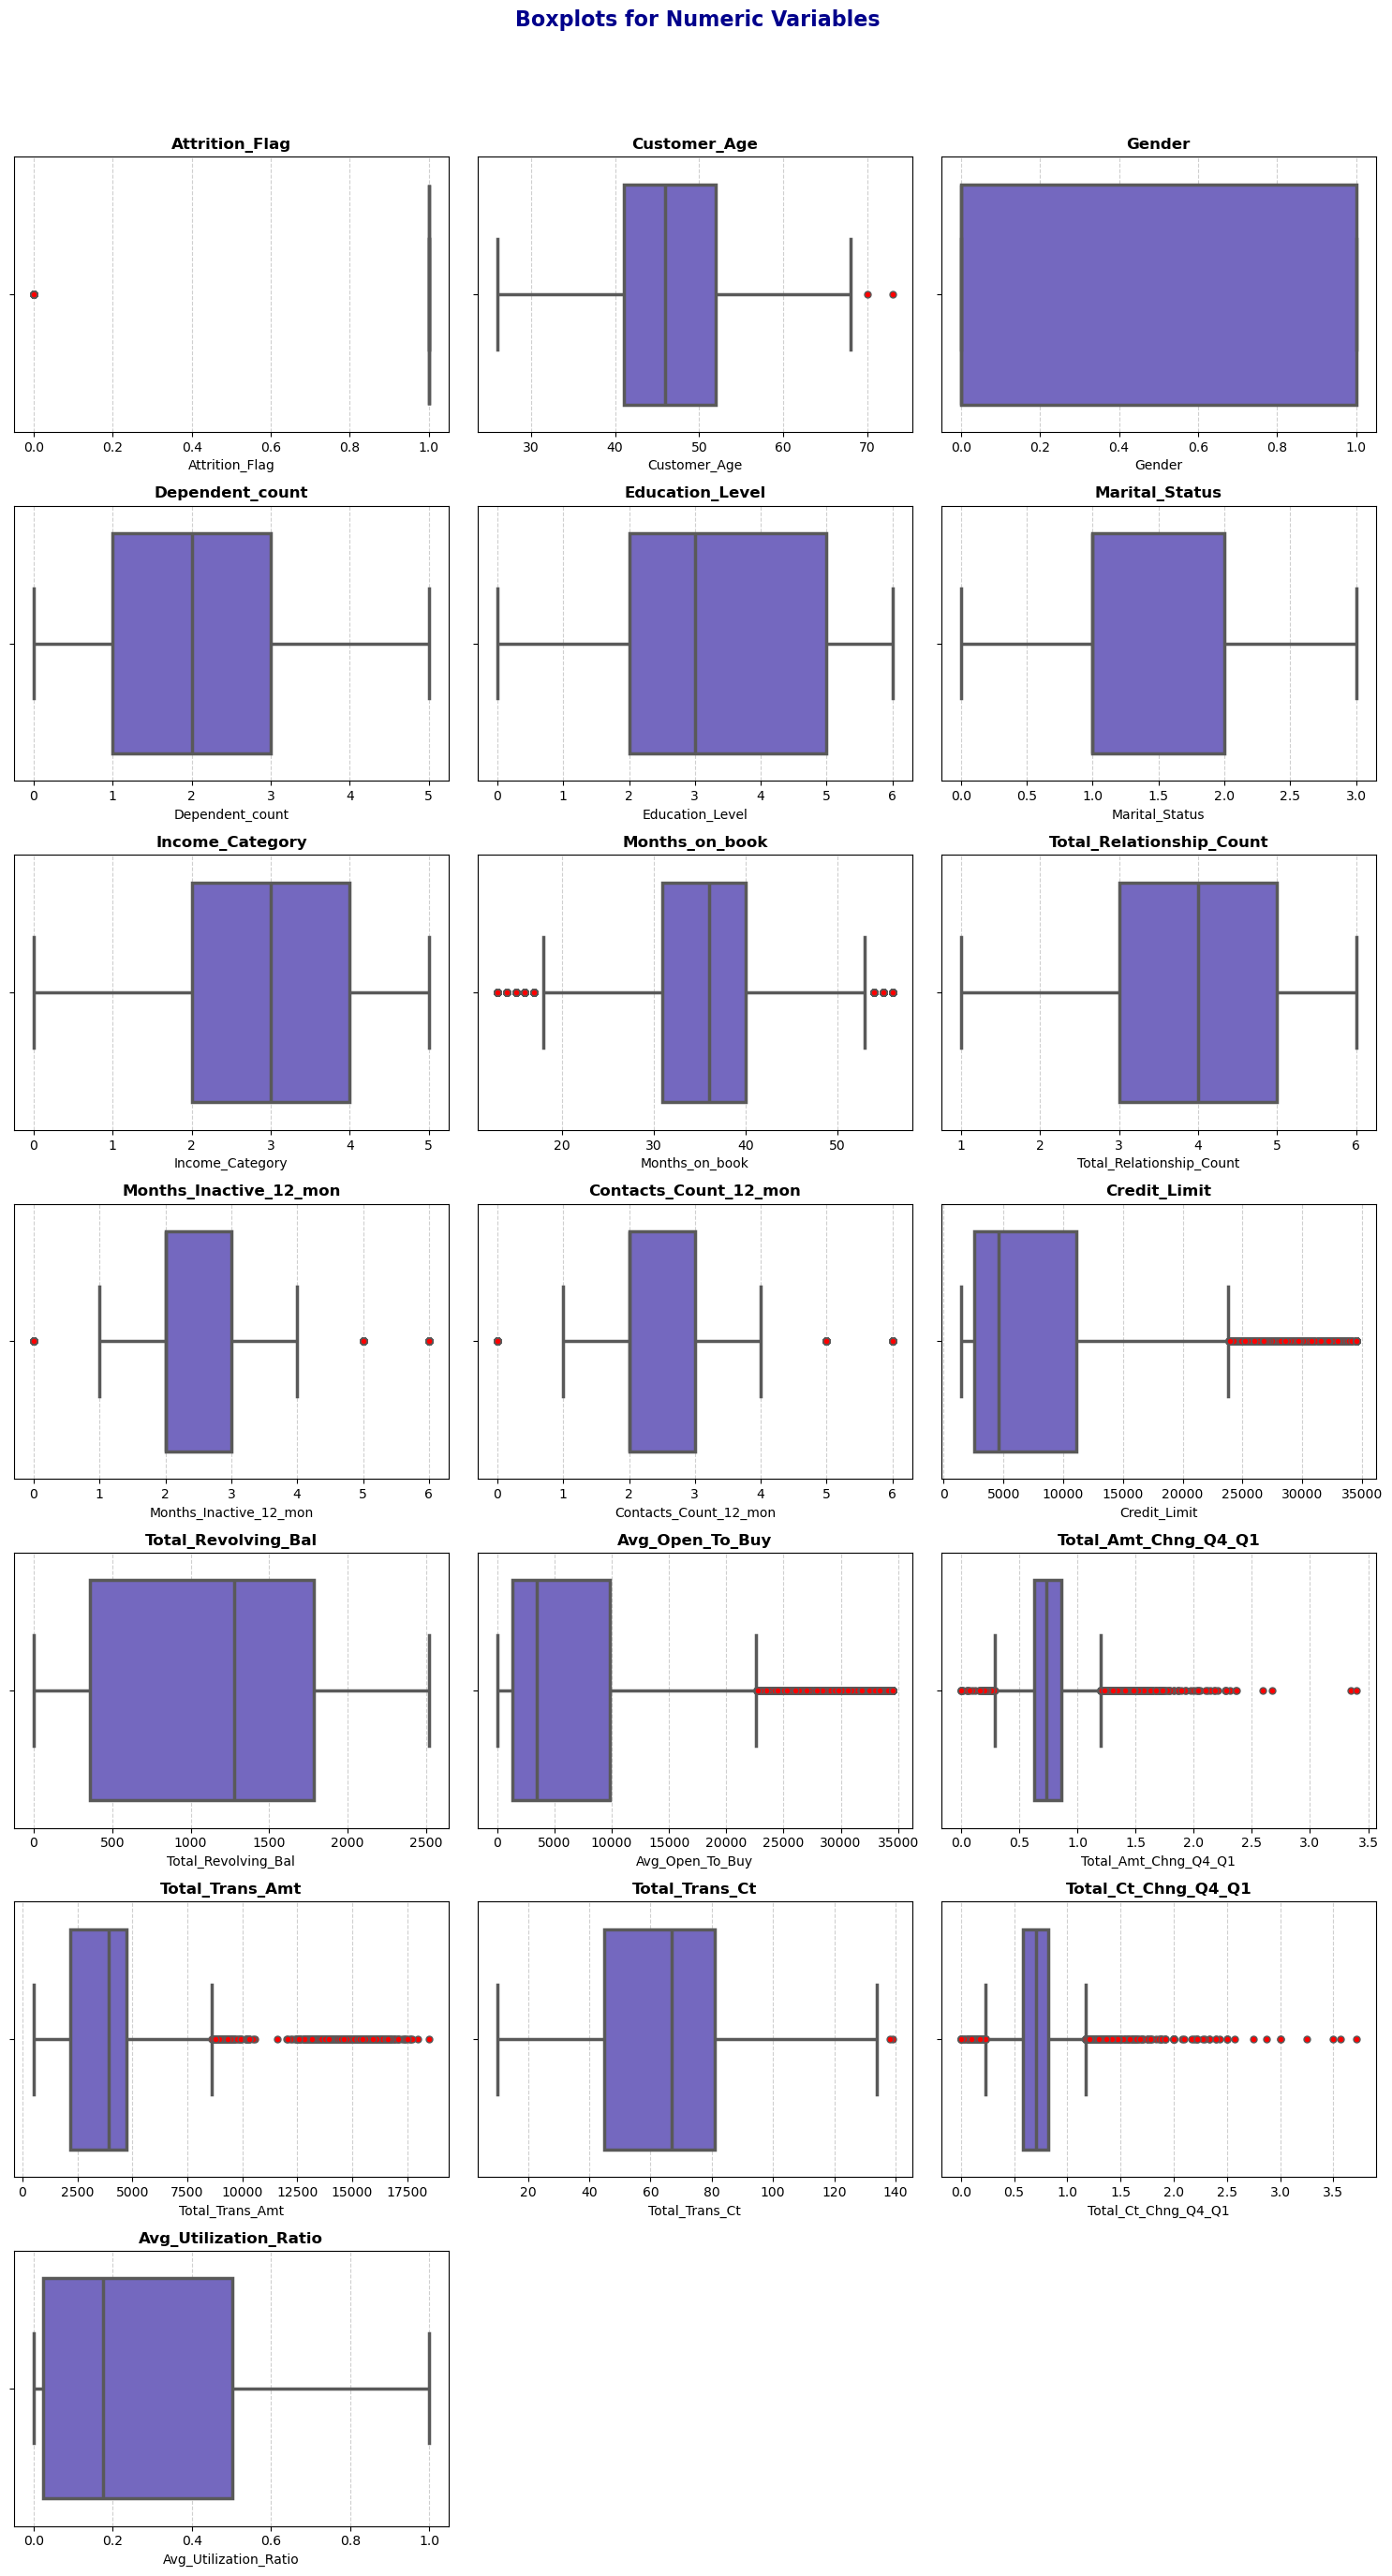

In [86]:
# Select numerical columns
numeric_cols = x.select_dtypes(exclude='object').columns

# Define the number of rows and columns for subplots
rows = (len(numeric_cols) // 3) + 1  # Adjust rows dynamically
cols = 3  # 3 plots per row

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
fig.suptitle("Boxplots for Numeric Variables", fontsize=16, fontweight='bold', color='darkblue')

# Flatten axes for easier indexing
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=x[col], color="slateblue", ax=axes[i], linewidth=2.5, 
                flierprops=dict(marker='o', markersize=5, markerfacecolor='red'))
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].grid(axis='x', linestyle='--', alpha=0.6)

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* Several variables (e.g., Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1) have many outliers on the higher end. This indicates some customers have significantly different spending or credit behaviors compared to the majority.
* Months_Inactive_12_mon and Contacts_Count_12_mon also have outliers, suggesting that a few customers have very high inactivity or contact counts.
* Most customers fall between 30 and 60 years old.
* Some customers in their 70s appear as outliers, indicating they might be a less common demographic in this dataset.
* Credit_Limit and Avg_Open_To_Buy show extreme values, meaning a few customers have exceptionally high credit limits.
* Total_Trans_Amt and Total_Trans_Ct have outliers, likely representing a small group of very high spenders.

#### Outliers detaection Using the IQR Method

In [89]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
((x>UL) | (x < LL)) # true means outlier is present

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10123,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10124,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10125,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Replace Outliers with NaN
This ensures missing values are imputed using KNN instead of direct removal

In [91]:
x[((x>UL) | (x < LL))] =np.NaN

#### Visualize Missing Data Using a Heatmap
##### Before Handling Outlier

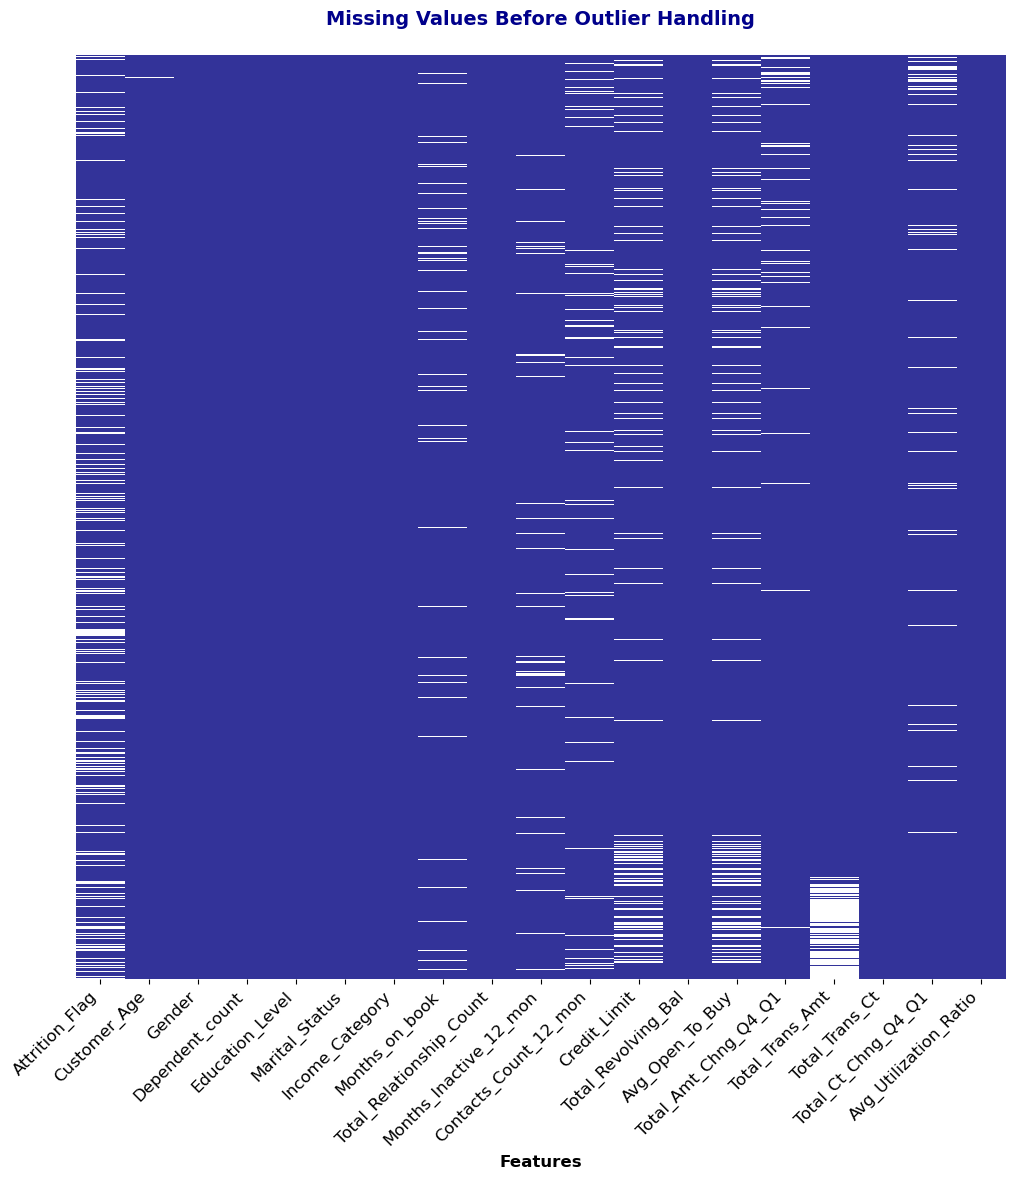

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(x.isnull(),cbar=False,cmap='terrain',yticklabels=False,linewidths=-0,    
            linecolor="black"
            )          
plt.title("Missing Values Before Outlier Handling\n",fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Features", fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

#### Apply KNN Imputation
Uses nearest neighbors (n_neighbors=5) to fill NaN values

In [95]:
#Apllying Capping Method using KNN Imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
#when used sklearn it automatically transforms into arrayform
x_impute = pd.DataFrame(imputer.fit_transform(x),columns=x.columns)

##### After Handling Outlier

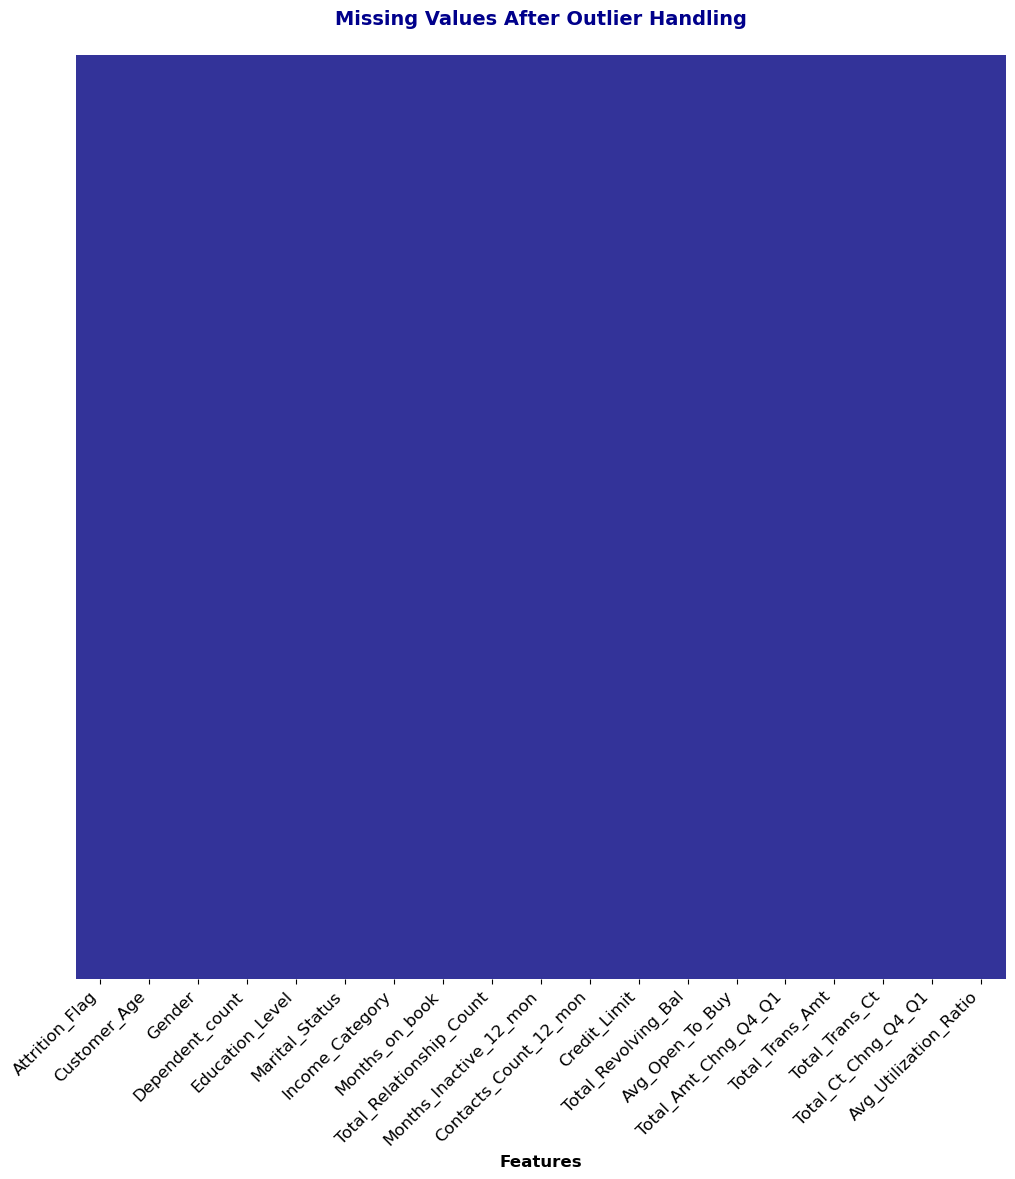

In [97]:
plt.figure(figsize=(12,12))
sns.heatmap(x_impute.isnull(),cbar=False,cmap='terrain',yticklabels=False,linewidths=-0,    
            linecolor="black"
            )          
plt.title("Missing Values After Outlier Handling\n",fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Features", fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

### Feature Scaling
Feature scaling is essential to bring all numerical variables to a similar range

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute),columns=x_impute.columns)

In [100]:
x_scaled

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,-0.164953,1.059956,0.503368,-0.052637,-0.628128,-0.574182,0.445726,0.763943,-1.483108,0.560289,1.221012,-0.473422,1.285984,0.272150,-1.436350,-0.974253,0.837367,-0.775882
1,0.0,0.334481,-0.943436,2.043199,-0.597678,0.727306,0.755053,1.162235,1.407306,-1.483108,-0.543612,0.361427,-0.366667,0.413906,0.161001,-1.354814,-1.358070,0.282046,-0.616276
2,0.0,0.584198,1.059956,0.503368,-0.597678,-0.628128,0.090436,0.015820,0.120579,-1.483108,0.339509,-0.576266,-1.426858,-0.352489,-0.208260,-1.024235,-1.912473,-0.704937,-0.997155
3,0.0,-0.789247,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.270784,-0.522785,2.064343,-1.647513,-0.596617,1.661686,-0.858148,0.536438,-1.421374,-1.912473,0.765233,1.759686
4,0.0,-0.789247,1.059956,0.503368,1.037447,-0.628128,-0.574182,-2.133708,0.763943,-1.483108,0.781070,-0.324690,-1.426858,-0.102167,0.685872,-1.618279,-1.571302,0.609514,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.459340,1.059956,-0.266547,-0.597678,0.727306,-1.238799,0.589028,-0.522785,-0.300624,0.560289,-0.462882,0.844455,-0.596640,-0.220610,0.549455,2.224226,0.927821,0.678714
10123,0.0,-0.664388,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-1.560501,0.120579,-0.300624,0.560289,-0.409776,1.255524,-0.608404,0.403059,0.819021,0.177200,-0.068321,0.856458
10124,0.0,-0.289812,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,0.015820,0.763943,0.881859,1.664191,-0.190373,-1.426858,0.031480,0.495683,-0.171829,-0.206618,0.704548,-0.997155
10125,0.0,-2.037833,1.059956,-0.266547,-0.597678,2.082739,-1.238799,0.015820,0.120579,0.881859,0.560289,-0.215182,-1.426858,0.006794,-1.258001,2.585512,-0.121325,0.154952,-0.997155


### Split the data into Train and Test Data
By splitting, the training set is used to train the model, and the test set is used to evaluate its real-world performance.

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x_scaled,y,test_size = 0.2,random_state = 42, stratify=y) #stratify=y to ensure balanced class distribution in both training and test sets.

### Build ML Models 
### Logistic Regression

In [104]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### Train Multiclass Logistic Regression

In [106]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

##### Make Predictions & Evaluate

Accuracy Score: 0.9344

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1888
           1       1.00      0.04      0.08        23
           2       0.00      0.00      0.00         4
           3       0.50      0.10      0.17       111

    accuracy                           0.93      2026
   macro avg       0.61      0.28      0.30      2026
weighted avg       0.91      0.93      0.91      2026



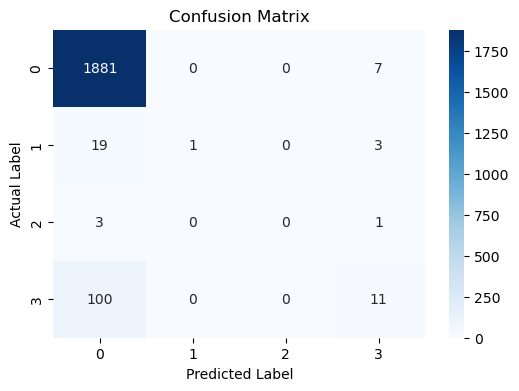

In [108]:
# Predictions
y_pred = model.predict(x_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.4f}')

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

Insights from the Classification Report & Confusion Matrix
* High Accuracy (93.44%) 

The model performs well in general, but accuracy alone isn't enough to evaluate its performance, especially for imbalanced datasets.

* Severe Class Imbalance 

The majority class (0) has 1888 samples, while other classes have very few instances (e.g., Class 2 has only 4 samples!).

This explains why precision/recall for classes 1, 2, and 3 are very low.

* Poor Recall for Minority Classes 

Class 1 has only 4% recall, meaning 96% of class 1 samples are misclassified.

Class 2 has 0% recall, meaning it is never correctly classified.

Class 3 has 10% recall, which is still very low.

### Building Ensemble model
### Random Forest Clasifier

In [111]:
#import Random Forest Clasifier
from sklearn.ensemble import RandomForestClassifier

##### Train Random Forest Clasifier

In [113]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
# random forest with simple method
# random forest with recusrsive approach
# random forest with PCA

RandomForestClassifier()

##### Model Prediction

In [115]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

##### Model Evaluation


************************* Confusion Matrix - Train ***********************************

[[7548    0    0    0]
 [   0   93    0    0]
 [   0    0   16    0]
 [   0    0    0  444]]


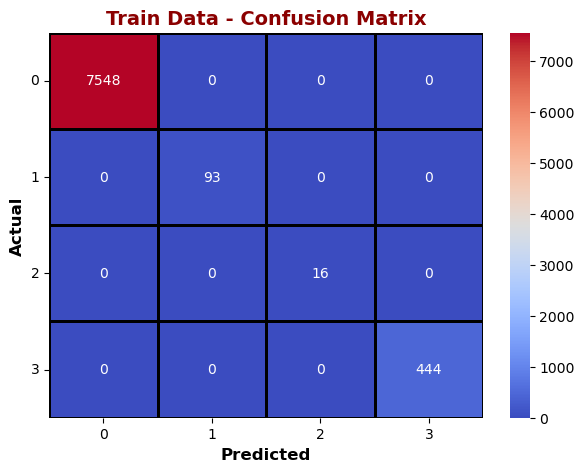


************************* Confusion Matrix - Test ***********************************

[[1885    0    0    3]
 [  22    0    0    1]
 [   2    0    0    2]
 [  92    0    0   19]]


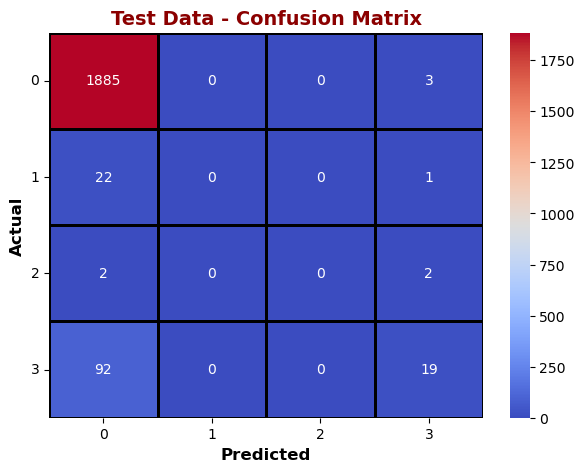

In [117]:
# Train Confusion Matrix
cm_train = confusion_matrix(y_train, pred_train_rf)
cm_test = confusion_matrix(y_test, pred_test_rf)

# Function for Heatmap Visualization
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor="black")
    plt.title(title, fontsize=14, fontweight="bold", color='darkred')
    plt.xlabel("Predicted", fontsize=12, fontweight="bold")
    plt.ylabel("Actual", fontsize=12, fontweight="bold")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10, rotation=0)
    plt.show()

# Print Text Output
print("\n************************* Confusion Matrix - Train ***********************************\n")
print(cm_train)
plot_confusion_matrix(cm_train, "Train Data - Confusion Matrix")

print("\n************************* Confusion Matrix - Test ***********************************\n")
print(cm_test)
plot_confusion_matrix(cm_test, "Test Data - Confusion Matrix")

In [118]:
print("*************************classification_report - Train ***********************************")
print(classification_report(y_train,pred_train_rf))  #To see overfitting and underfitting problems
print("*************************classification_report - Test ***********************************")
print(classification_report(y_test,pred_test_rf))

*************************classification_report - Train ***********************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7548
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00       444

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

*************************classification_report - Test ***********************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1888
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.76      0.17      0.28       111

    accuracy                           0.94      2026
   macro avg       0.43      0.29      0.31      2026
weig

In [119]:
print("*************************accuracy_score - Train ***********************************")
print(accuracy_score(y_train,pred_train_rf))  #To see overfitting and underfitting problems
print("*************************accuracy_score - Test ***********************************")
print(accuracy_score(y_test,pred_test_rf))

*************************accuracy_score - Train ***********************************
1.0
*************************accuracy_score - Test ***********************************
0.9397828232971372


### Potential Issues: By Test and training score 

* Overfitting Detected → The model performs too well on training data but struggles on test data.
* Poor Generalization → The model fails to classify minority classes properly.



### Random Forest Classifier - Recursive Feature Elimination Method

In [122]:
#import Recursive Feature Elimination Method
from sklearn.feature_selection import RFE 

##### Train

In [124]:
rf1=RandomForestClassifier()
Features = RFE(estimator=rf1,n_features_to_select = 17,step=1)
Features = Features.fit(x_train,y_train)

##### Predict

In [126]:
pred_train_rf1 = Features.predict(x_train)
pred_test_rf1 =  Features.predict(x_test)

##### Evaluation

In [128]:
print("*************************accuracy_score - Train ***********************************")
print(accuracy_score(y_train,pred_train_rf1))  #To see overfitting and underfitting problems
print("*************************accuracy_score - Test ***********************************")
print(accuracy_score(y_test,pred_test_rf1))

*************************accuracy_score - Train ***********************************
1.0
*************************accuracy_score - Test ***********************************
0.9422507403751234


* model is overfitting when n_features=11, so take n_features as 17 and still problem exists
* since model is overfitting : Along with the feature selection apply cross Validation method

##### Cross Validation with Random Forest

In [131]:
# import Cross Validation
from sklearn.model_selection import cross_val_score

rf_rfe_training = cross_val_score(Features,x_train,y_train,cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.95191122 0.94938272 0.9382716  0.94074074 0.94197531 0.94074074
 0.94567901 0.95061728 0.94938272 0.94567901]

0.9454380356517635


By CV Accuracy we can say that model generalizes well across different subsets of training data

In [133]:
# we can also use hyper parameter tuning if the accuracy is 70,72...
# We can do Preprocessing, featur selections  for the better results

### Random forest with Principal Component Analysis  (PCA)


In [135]:
#import PCA
from sklearn.decomposition import PCA
pca =PCA(n_components=10) #taking 95% confidence
pca_fit = pca.fit_transform (x_scaled)

##### Train Test Split 

In [184]:
x_train,x_test,y_train,y_test = train_test_split(pca_fit,y,test_size =0.2,random_state = 42,stratify=y)

##### Build Random forest 

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

##### Predict

In [193]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

### Evaluation

In [195]:
print("*************************accuracy_score - Train ***********************************")
print(accuracy_score(y_train,pred_train_rf))  #To see overfitting and underfitting problems
print("*************************accuracy_score - Test ***********************************")
print(accuracy_score(y_test,pred_test_rf))

*************************accuracy_score - Train ***********************************
1.0
*************************accuracy_score - Test ***********************************
0.9318854886475815


* Training Accuracy: 99.98%
Almost perfect, indicating the model has learned the patterns well.
* Test Accuracy: 93.29%
Strong performance, but there might still be a slight overfitting issue.

###  GradientBoostingClassifier

In [267]:
#import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

x_train,x_test,y_train,y_test = train_test_split (x_scaled,y,test_size = 0.2,random_state = 42, stratify=y) #stratify=y to ensure balanced class distribution in both training and test sets.


##### Train the Model

In [270]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

##### Feature Importance 

In [252]:
# Ensure x_train has correct column names by using the original DataFrame columns
x_train_df = pd.DataFrame(x_train, columns=x.columns)  

# Create DataFrame with feature names and importance scores
f_df2 = pd.DataFrame({
    "Features": x_train_df.columns,  
    "gb_importance": gb.feature_importances_
}).sort_values(by="gb_importance", ascending=False)

# Display the feature importance DataFrame
print(f_df2)

                    Features  gb_importance
11              Credit_Limit       0.222988
6            Income_Category       0.193954
12       Total_Revolving_Bal       0.168134
18     Avg_Utilization_Ratio       0.153647
15           Total_Trans_Amt       0.073355
13           Avg_Open_To_Buy       0.058429
2                     Gender       0.056961
16            Total_Trans_Ct       0.028714
7             Months_on_book       0.009609
17       Total_Ct_Chng_Q4_Q1       0.007551
1               Customer_Age       0.004972
14      Total_Amt_Chng_Q4_Q1       0.003841
5             Marital_Status       0.003602
3            Dependent_count       0.003557
8   Total_Relationship_Count       0.003550
9     Months_Inactive_12_mon       0.002922
4            Education_Level       0.002869
10     Contacts_Count_12_mon       0.001345
0             Attrition_Flag       0.000000


##### Visualization for feature importance 

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

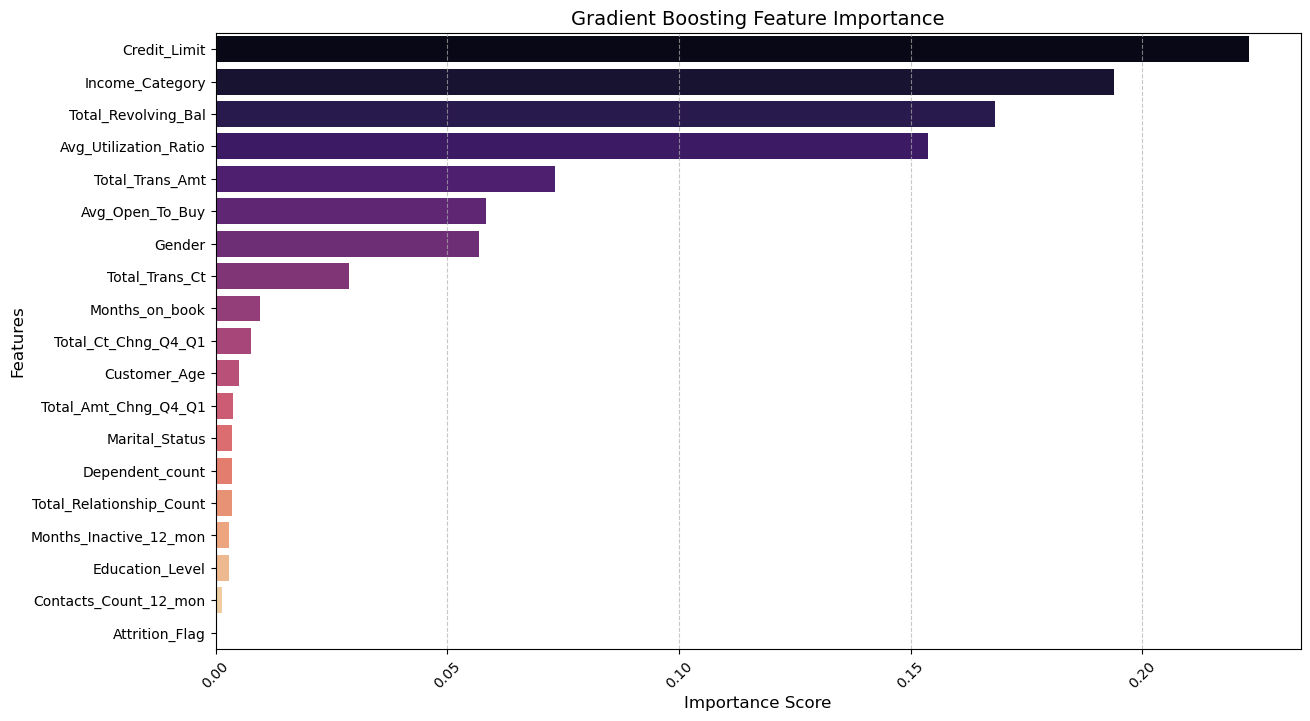

In [243]:

plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(x=f_df2["gb_importance"], y=f_df2["Features"], palette="magma")

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Gradient Boosting Feature Importance", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid for better readability

plt.show()

##### Predict

In [258]:
pred_train_gb = gb.predict(x_train)
pred_test_gb = gb.predict(x_test)

In [260]:
print("*************************accuracy_score - Train ***********************************")
print(accuracy_score(y_train,pred_train_gb))  #To see overfitting and underfitting problems
print("*************************accuracy_score - Test ***********************************")
print(accuracy_score(y_test,pred_test_gb))

*************************accuracy_score - Train ***********************************
0.9774101962720652
*************************accuracy_score - Test ***********************************
0.9526159921026653


## Conclusion

* so results are better with Greadient Boosting  now when compared to previous , where we have applied PCA 

* Gradient boosting
Train Accuracy (97.74%) → The model is learning well from the training data.

Test Accuracy (95.26%) → The model generalizes well to unseen data.